In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lagged_coherence import *

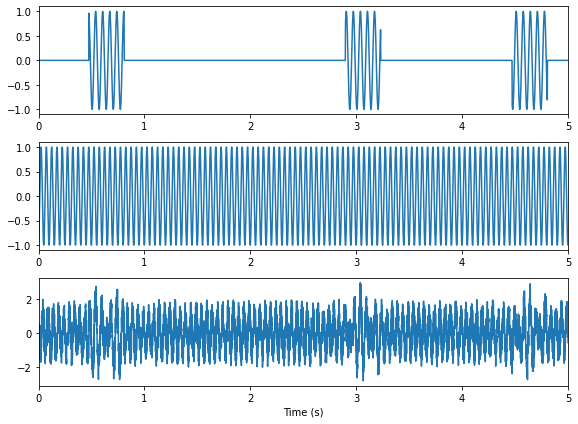

In [2]:
dt=.001
T=5
trials=100
time=np.linspace(0,T,int(T/dt))
srate=1/dt

f1 = 15
f1_max_cycles=5
f1_bursts_per_trial=3
f2 = 20
w1 = 2. * np.pi * f1
w2 = 2. * np.pi * f2
signal=np.zeros((trials,len(time)))
s1s=np.zeros((trials,len(time)))
for i in range(trials):
    burst_starts=[]
    burst_stops=[]
    while len(burst_starts)<f1_bursts_per_trial:
        cycles=f1_max_cycles
        cycles_dur_s=cycles/f1
        dur=int(cycles_dur_s/dt)
        start=np.random.randint(int(T/dt)-dur)
        stop=start+dur
        overlap=False
        for (other_start,other_stop) in zip(burst_starts,burst_stops):
            if (start >= other_start and start < other_stop) or (stop > other_start and stop <= other_stop):
                overlap=True
                break
        if not overlap:
            s1s[i,start:stop]=np.sin(w1 * (time[start:stop]+np.random.randn()))
            burst_starts.append(start)
            burst_stops.append(stop)
    s2=np.sin(w2 * (time+np.random.randn()))
    signal[i,:]=s1s[i,:]+s2+np.random.uniform(-1,1,len(time))

plt.figure(figsize=(8,6))
plt.subplot(3,1,1)
plt.plot(time,s1s[0,:])
plt.xlim(time[[0,-1]])
plt.subplot(3,1,2)
plt.plot(time,s2)
plt.xlim(time[[0,-1]])
plt.subplot(3,1,3)
plt.plot(time,signal[0,:])
plt.xlim(time[[0,-1]])
plt.xlabel('Time (s)')
plt.tight_layout()

In [3]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,6,50)
trial_lcs_classic=lagged_coherence_classic(signal, freqs, lags, srate)

In [4]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,6,50)
trial_lcs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate)

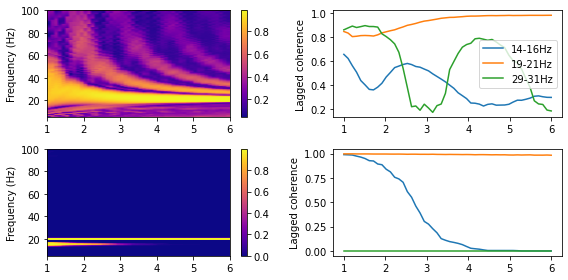

In [5]:
plt.figure(figsize=(8,4))
plt.subplot(2,2,1)
i1=plt.imshow(np.mean(trial_lcs_classic,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,2)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_classic[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_classic[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_classic[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.ylabel('Lagged coherence')
plt.legend()

plt.subplot(2,2,3)
i1=plt.imshow(np.mean(trial_lcs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,4)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,low_frange,:],axis=1),axis=0))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,high_frange,:],axis=1),axis=0))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,high_frange,:],axis=1),axis=0))
plt.ylabel('Lagged coherence')
plt.tight_layout()

In [6]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,6,50)
trial_lplvs_classic=lagged_coherence_classic(signal, freqs, lags, srate, type='plv')

In [7]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,6,50)
trial_lplvs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, type='plv')

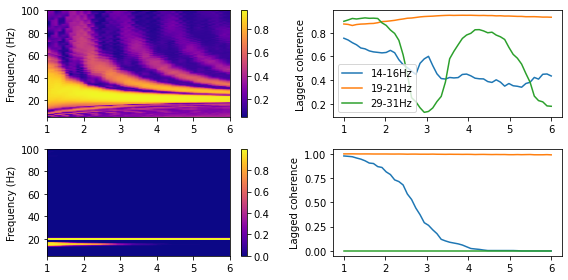

In [8]:
plt.figure(figsize=(8,4))
plt.subplot(2,2,1)
i1=plt.imshow(np.mean(trial_lplvs_classic,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,2)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_classic[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_classic[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_classic[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.ylabel('Lagged coherence')
plt.legend()

plt.subplot(2,2,3)
i1=plt.imshow(np.mean(trial_lplvs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,4)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,low_frange,:],axis=1),axis=0))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,high_frange,:],axis=1),axis=0))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,high_frange,:],axis=1),axis=0))
plt.ylabel('Lagged coherence')
plt.tight_layout()

In [9]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,7,50)
trial_lacs_classic=lagged_coherence_classic(signal, freqs, lags, srate, type='amp_coh')

In [10]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,7,50)
trial_lacs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, type='amp_coh')

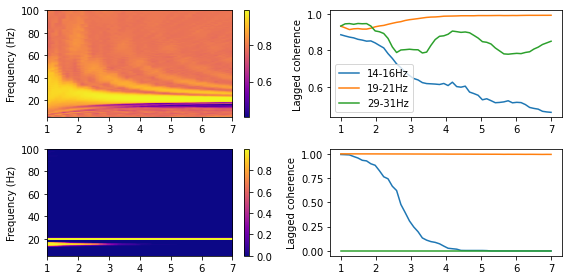

In [11]:
plt.figure(figsize=(8,4))
plt.subplot(2,2,1)
i1=plt.imshow(np.mean(trial_lacs_classic,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,2)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_classic[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_classic[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_classic[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.ylabel('Lagged coherence')
plt.legend()

plt.subplot(2,2,3)
i1=plt.imshow(np.mean(trial_lacs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,4)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,low_frange,:],axis=1),axis=0))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,high_frange,:],axis=1),axis=0))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,high_frange,:],axis=1),axis=0))
plt.ylabel('Lagged coherence')
plt.tight_layout()

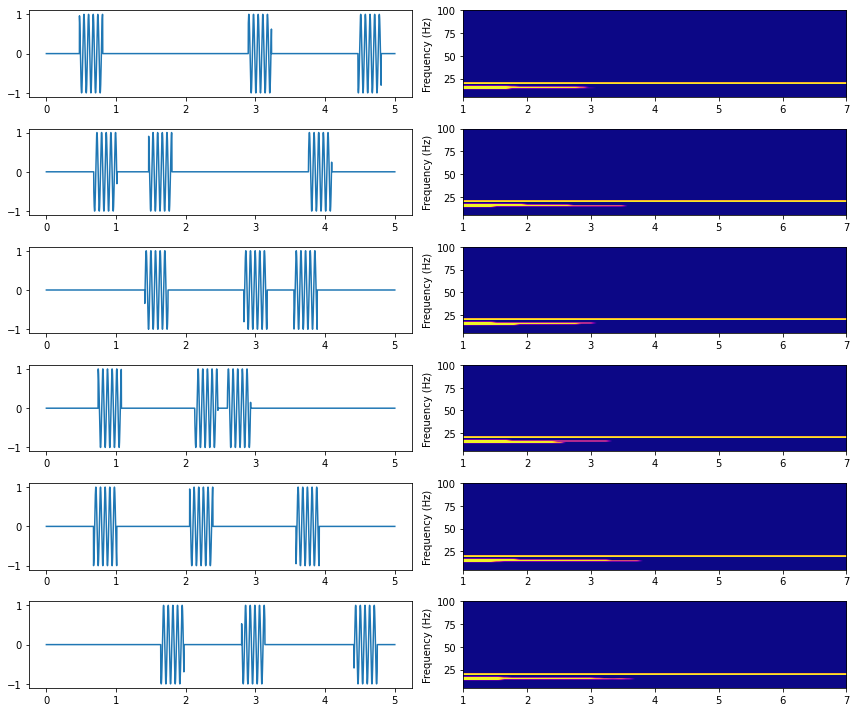

In [12]:
plt.figure(figsize=(12,10))
plt_idx=1
for i in range(6):
    plt.subplot(6,2,plt_idx)
    plt.plot(time,s1s[i,:])
    plt_idx+=1
    
    plt.subplot(6,2,plt_idx)
    i1=plt.imshow(trial_lcs_surrogate[i,:,:], aspect='auto', cmap='plasma', 
                  extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
                  origin='lower')
    if i>=trials-2:
        plt.xlabel('Lag (cycles)')
    plt.ylabel('Frequency (Hz)')
    plt_idx+=1
plt.tight_layout()

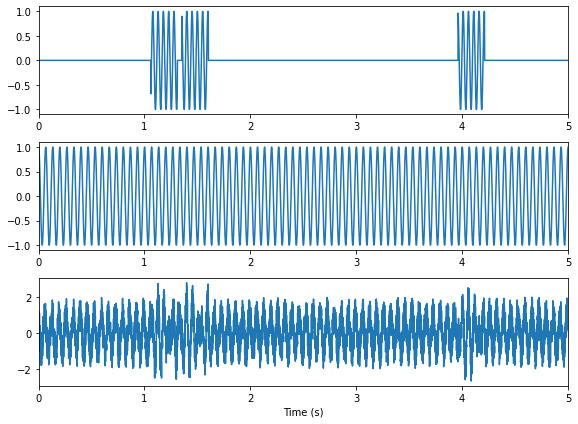

In [13]:
dt=.001
T=5
trials=100
time=np.linspace(0,T,int(T/dt))
srate=1/dt

f1 = 20
f1_max_cycles=5
f1_bursts_per_trial=3
f2 = 15
w1 = 2. * np.pi * f1
w2 = 2. * np.pi * f2
signal=np.zeros((trials,len(time)))
s1s=np.zeros((trials,len(time)))
for i in range(trials):
    burst_starts=[]
    burst_stops=[]
    while len(burst_starts)<f1_bursts_per_trial:
        cycles=f1_max_cycles
        cycles_dur_s=cycles/f1
        dur=int(cycles_dur_s/dt)
        start=np.random.randint(int(T/dt)-dur)
        stop=start+dur
        overlap=False
        for (other_start,other_stop) in zip(burst_starts,burst_stops):
            if (start >= other_start and start < other_stop) or (stop > other_start and stop <= other_stop):
                overlap=True
                break
        if not overlap:
            s1s[i,start:stop]=np.sin(w1 * (time[start:stop]+np.random.randn()))
            burst_starts.append(start)
            burst_stops.append(stop)
    s2=np.sin(w2 * (time+np.random.randn()))
    signal[i,:]=s1s[i,:]+s2+np.random.uniform(-1,1,len(time))

plt.figure(figsize=(8,6))
plt.subplot(3,1,1)
plt.plot(time,s1s[0,:])
plt.xlim(time[[0,-1]])
plt.subplot(3,1,2)
plt.plot(time,s2)
plt.xlim(time[[0,-1]])
plt.subplot(3,1,3)
plt.plot(time,signal[0,:])
plt.xlim(time[[0,-1]])
plt.xlabel('Time (s)')
plt.tight_layout()

In [14]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,7,50)
trial_lcs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, type='coh')
trial_lplvs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, type='plv')
trial_lacs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, type='amp_coh')

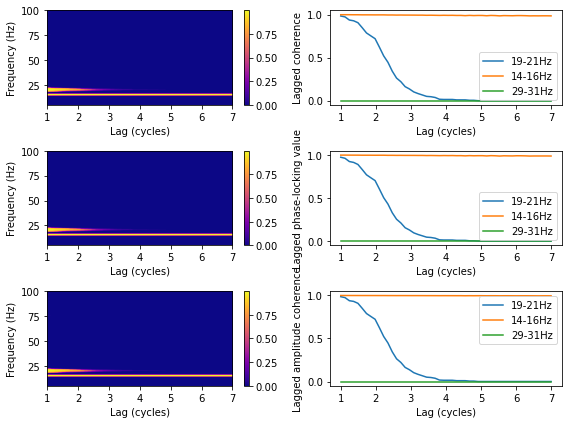

In [15]:
plt.figure(figsize=(8,6))
plt.subplot(3,2,1)
i1=plt.imshow(np.mean(trial_lcs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.xlabel('Lag (cycles)')
plt.ylabel('Frequency (Hz)')
plt.subplot(3,2,2)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.legend()
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged coherence')

plt.subplot(3,2,3)
i1=plt.imshow(np.mean(trial_lplvs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.xlabel('Lag (cycles)')
plt.ylabel('Frequency (Hz)')
plt.subplot(3,2,4)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.legend()
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged phase-locking value')

plt.subplot(3,2,5)
i1=plt.imshow(np.mean(trial_lacs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.xlabel('Lag (cycles)')
plt.ylabel('Frequency (Hz)')
plt.subplot(3,2,6)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.legend()
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged amplitude coherence')
plt.tight_layout()

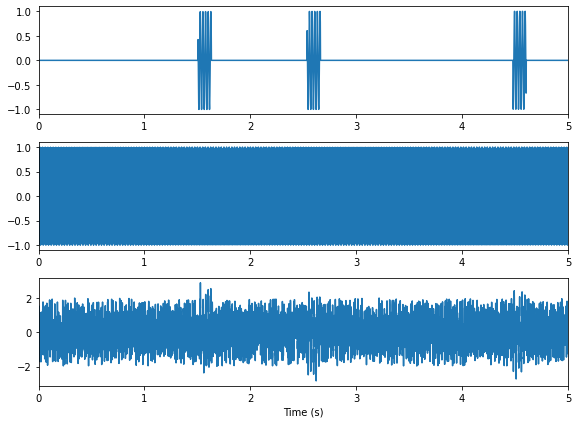

In [16]:
dt=.001
T=5
trials=100
time=np.linspace(0,T,int(T/dt))
srate=1/dt

f1 = 40
f1_max_cycles=5
f1_bursts_per_trial=3
f2 = 80
w1 = 2. * np.pi * f1
w2 = 2. * np.pi * f2
signal=np.zeros((trials,len(time)))
s1s=np.zeros((trials,len(time)))
for i in range(trials):
    burst_starts=[]
    burst_stops=[]
    while len(burst_starts)<f1_bursts_per_trial:
        cycles=f1_max_cycles
        cycles_dur_s=cycles/f1
        dur=int(cycles_dur_s/dt)
        start=np.random.randint(int(T/dt)-dur)
        stop=start+dur
        overlap=False
        for (other_start,other_stop) in zip(burst_starts,burst_stops):
            if (start >= other_start and start < other_stop) or (stop > other_start and stop <= other_stop):
                overlap=True
                break
        if not overlap:
            s1s[i,start:stop]=np.sin(w1 * (time[start:stop]+np.random.randn()))
            burst_starts.append(start)
            burst_stops.append(stop)
    s2=np.sin(w2 * (time+np.random.randn()))
    signal[i,:]=s1s[i,:]+s2+np.random.uniform(-1,1,len(time))

plt.figure(figsize=(8,6))
plt.subplot(3,1,1)
plt.plot(time,s1s[0,:])
plt.xlim(time[[0,-1]])
plt.subplot(3,1,2)
plt.plot(time,s2)
plt.xlim(time[[0,-1]])
plt.subplot(3,1,3)
plt.plot(time,signal[0,:])
plt.xlim(time[[0,-1]])
plt.xlabel('Time (s)')
plt.tight_layout()

In [17]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,7,50)
trial_lcs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, type='coh')
trial_lplvs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, type='plv')
trial_lacs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, type='amp_coh')

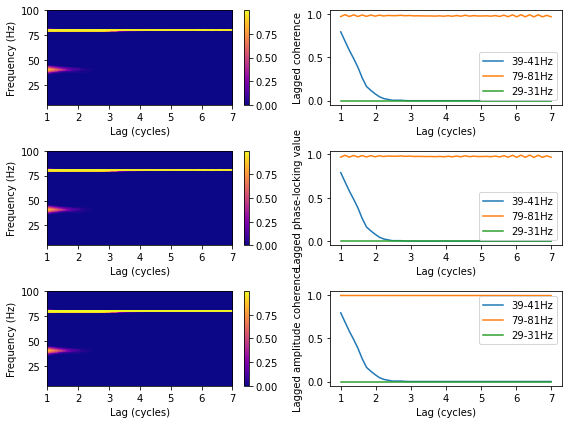

In [18]:
plt.figure(figsize=(8,6))
plt.subplot(3,2,1)
i1=plt.imshow(np.mean(trial_lcs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.xlabel('Lag (cycles)')
plt.ylabel('Frequency (Hz)')
plt.subplot(3,2,2)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.legend()
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged coherence')

plt.subplot(3,2,3)
i1=plt.imshow(np.mean(trial_lplvs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.xlabel('Lag (cycles)')
plt.ylabel('Frequency (Hz)')
plt.subplot(3,2,4)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.legend()
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged phase-locking value')

plt.subplot(3,2,5)
i1=plt.imshow(np.mean(trial_lacs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.xlabel('Lag (cycles)')
plt.ylabel('Frequency (Hz)')
plt.subplot(3,2,6)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.legend()
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged amplitude coherence')
plt.tight_layout()

In [19]:
# dt=.001
# T=5
# trials=100
# time=np.linspace(0,T,int(T/dt))
# srate=1/dt
# freqs=np.linspace(5,100,50)
# lags=np.linspace(.5,7,10)

# err=np.zeros((len(freqs),len(lags)))
# all_lcs=np.zeros((len(freqs),len(lags),len(lags)))
# for f_idx, freq in enumerate(freqs):
#     freq=freqs[f_idx]
#     for l_idx, cycles in enumerate(lags):
#         w = 2. * np.pi * freq
#         bursts_per_trial=5
#         signal=np.zeros((trials,len(time)))
#         for i in range(trials):
#             s=np.zeros((len(time)))
#             for j in range(bursts_per_trial):
#                 cycles_dur_s=cycles/freq
#                 dur=int(cycles_dur_s/dt)
#                 start=np.random.randint(int(T/dt))
#                 s[start:start+dur]=np.sin(w * (time[start:start+dur]+np.random.randn()))
#             signal[i,:]=s+np.random.uniform(-1,1,len(time))
#         lcs=lagged_surrogate_coherence2(signal, freqs, lags, srate)

#         m_lcs=np.mean(lcs,axis=0)
#         peak=np.max(m_lcs[f_idx,:])
#         lt=np.where(m_lcs[f_idx,:]<=peak*.5)[0]
#         if len(lt):
#             fwhm=lags[lt[0]]
#         else:
#             fwhm=lags[-1]
#         err[f_idx,l_idx]=cycles-fwhm
#         all_lcs[f_idx,l_idx,:]=m_lcs[f_idx,:]


In [20]:
# #plt.plot(freqs,err)
# im=plt.imshow(err,origin='lower',aspect='auto',extent=[lags[0],lags[-1],freqs[0],freqs[-1]])
# plt.colorbar(im)

In [21]:
# #plt.plot(freqs,err)
# im=plt.imshow(err,origin='lower',aspect='auto',extent=[lags[0],lags[-1],freqs[0],freqs[-1]])
# plt.colorbar(im)

In [22]:
# cool_colors=plt.cm.cool(np.linspace(0,1,len(freqs)))
# for f_idx in range(len(freqs)):
#     plt.plot(lags,all_lcs[f_idx,0,:],color=cool_colors[f_idx])

In [23]:
# cool_colors=plt.cm.cool(np.linspace(0,1,len(lags)))
# for l_idx in range(len(lags)):
#     plt.plot(lags,all_lcs[19,l_idx,:],color=cool_colors[l_idx])